#Brain Segmentation using UNET and RES-UNET
**Author -> Shivansh Singla**


#IMPORTING PACKAGES

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array,load_img
import os 
from sklearn.model_selection import train_test_split

#LOADING DATASET AND IMAGE PROCESSING

In [ ]:
from google.colab import files
#upload kaggle.json
uploaded = files.upload()

#kaggle.json needs to be in root/.kaggle/kaggle.json
!mkdir /root/.kaggle -v #makes the .kaggle folder in root
!mv kaggle.json /root/.kaggle -v #moves the file uploaded to contents to root/.kaggle
!chmod 600 /root/.kaggle/kaggle.json #gives permission

Saving kaggle.json to kaggle.json
mkdir: created directory '/root/.kaggle'
renamed 'kaggle.json' -> '/root/.kaggle/kaggle.json'


In [ ]:
!kaggle datasets download -d ashkhagan/brain-tumor-dataset-with-saliency

 98% 777M/790M [00:24<00:00, 39.9MB/s]
100% 790M/790M [00:24<00:00, 33.9MB/s]


In [ ]:
#extracting the zip file here
!unzip /content/brain-tumor-dataset-with-saliency.zip

Streaming output truncated to the last 5000 lines.
  inflating: saliency_maps_1/2012.png  
  inflating: saliency_maps_1/2013.png  
  inflating: saliency_maps_1/2014.png  
  inflating: saliency_maps_1/2015.png  
  inflating: saliency_maps_1/2016.png  
  inflating: saliency_maps_1/2017.png  
  inflating: saliency_maps_1/2018.png  
  inflating: saliency_maps_1/2019.png  
  inflating: saliency_maps_1/202.png  
  inflating: saliency_maps_1/2020.png  
  inflating: saliency_maps_1/2021.png  
  inflating: saliency_maps_1/2022.png  
  inflating: saliency_maps_1/2023.png  
  inflating: saliency_maps_1/2024.png  
  inflating: saliency_maps_1/2025.png  
  inflating: saliency_maps_1/2026.png  
  inflating: saliency_maps_1/2027.png  
  inflating: saliency_maps_1/2028.png  
  inflating: saliency_maps_1/2029.png  
  inflating: saliency_maps_1/203.png  
  inflating: saliency_maps_1/2030.png  
  inflating: saliency_maps_1/2031.png  
  inflating: saliency_maps_1/2032.png  
  inflating: saliency_maps_1/20

In [ ]:
#as paths are not naturally sorted like 1,2,3,4
#we will need to sort them like this for proper training and results
#but inbuilt sort has 1,10,2,20 for strings this will create a problem
#so we use this library natsort which can be used to perform natural sort which we desire
from natsort import natsorted

In [ ]:
#dividing by 255 to bring the intesties between 0 and 1 which are required if the data is in float
from skimage.transform import resize
def processing(pth):
    input_image = load_img(pth,color_mode="grayscale")
    input_image = img_to_array(input_image)
    input_image = input_image / 255.0
    #enough RAM is present on colab
    input_image = resize(input_image, (256, 256,1), mode="constant",preserve_range=True)
    return input_image

(512, 512, 3)


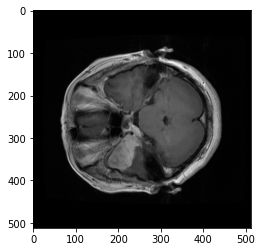

In [ ]:
print(img_to_array(load_img('images/0.png')).shape)
plt.imshow(img_to_array(load_img('images/0.png'))/255.0)

In [ ]:
#we need to figure out the name of our files and remove the any unnecessary folders
#This will also help us get the dimensions of the np array we need to declare
#Declaring np array is important because most of the modules of tensorflow require np arrays as input to determine shape



img_path = 'images'
mask_path = 'masks'

imgs = os.listdir(img_path)
masks = os.listdir(mask_path)

imgs = natsorted(imgs, key=lambda y: y.lower())
masks = natsorted(masks, key=lambda y: y.lower())

#lets remove the empty folders from the our paths
#and also save the the complete paths not references
actual_imgs,actual_masks = [],[]
for i in imgs:
    if not os.path.isfile(img_path + '/' + i):
        continue
    actual_imgs.append(os.path.join(img_path,i))
for j in masks:
    if not os.path.isfile(mask_path + '/' + j):
        continue
    actual_masks.append(os.path.join(mask_path,j))

#now we are also deleting imgs,masks to save memory
del imgs
del masks


#figuring the dimensions of X,Y
num = len(actual_imgs)
x = 256
y = 256
z = 1
X = np.zeros(shape = (num,x,y,z))
Y = np.zeros(shape = (num,x,y,z))

print(X.shape,Y.shape)
ind = 0

#Now we have to get the file names from the folders
#which contain images and their masks respectively
#and save them in X,Y respectively
#we will preprocess the images in running i.e by dividing by 255.0 and normalizing
for (i,j) in zip(actual_imgs,actual_masks):
    X[ind] = processing(i)
    Y[ind] = processing(j)
    ind+=1

(3064, 256, 256, 1) (3064, 256, 256, 1)


In [ ]:
print(zip(actual_imgs,actual_masks))
for (i,j) in zip(actual_imgs,actual_masks):
    print(i,j)

images/0.png masks/0_mask.png
images/1.png masks/1_mask.png
images/2.png masks/2_mask.png
images/3.png masks/3_mask.png
images/4.png masks/4_mask.png
images/5.png masks/5_mask.png
images/6.png masks/6_mask.png
images/7.png masks/7_mask.png
images/8.png masks/8_mask.png
images/9.png masks/9_mask.png
images/10.png masks/10_mask.png
images/11.png masks/11_mask.png
images/12.png masks/12_mask.png
images/13.png masks/13_mask.png
images/14.png masks/14_mask.png
images/15.png masks/15_mask.png
images/16.png masks/16_mask.png
images/17.png masks/17_mask.png
images/18.png masks/18_mask.png
images/19.png masks/19_mask.png
images/20.png masks/20_mask.png
images/21.png masks/21_mask.png
images/22.png masks/22_mask.png
images/23.png masks/23_mask.png
images/24.png masks/24_mask.png
images/25.png masks/25_mask.png
images/26.png masks/26_mask.png
images/27.png masks/27_mask.png
images/28.png masks/28_mask.png
images/29.png masks/29_mask.png
images/30.png masks/30_mask.png
images/31.png masks/31_mask.

(3064, 256, 256, 1)


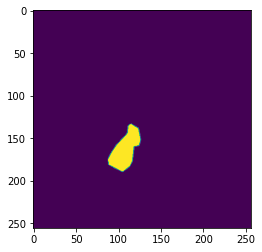

In [ ]:
print(X.shape)
plt.imshow(np.squeeze(Y[0]))

#BUILDING TRAIN AND TEST

In [ ]:
#getting a train test split is important because validation part of data will help us to prevent overfitting
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75)
del X
del Y

#UNET

In [ ]:
X_train.shape

(2298, 256, 256, 1)

In [ ]:
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPool2D, UpSampling2D, Concatenate, Input
from tensorflow.keras.models import Model

def batchnorm_relu(inputs):
    """ Batch Normalization & ReLU """
    x = BatchNormalization()(inputs)
    x = Activation("relu")(x)
    return x

def residual_block(inputs, num_filters, strides=1):
    """ Convolutional Layers """
    x = batchnorm_relu(inputs)
    x = Conv2D(num_filters, 3, padding="same", strides=strides)(x)
    x = batchnorm_relu(x)
    x = Conv2D(num_filters, 3, padding="same", strides=1)(x)

    """ Shortcut Connection (Identity Mapping) """
    s = Conv2D(num_filters, 1, padding="same", strides=strides)(inputs)

    """ Addition """
    x = x + s
    return x

def decoder_block(inputs, skip_features, num_filters):
    """ Decoder Block """

    x = UpSampling2D((2, 2))(inputs)
    x = Concatenate()([x, skip_features])
    x = residual_block(x, num_filters, strides=1)
    return x

def build_resunet(input_shape):
    """ RESUNET Architecture """

    inputs = Input(input_shape)

    """ Endoder 1 """
    x = Conv2D(64, 3, padding="same", strides=1)(inputs)
    x = batchnorm_relu(x)
    x = Conv2D(64, 3, padding="same", strides=1)(x)
    s = Conv2D(64, 1, padding="same")(inputs)
    s1 = x + s

    """ Encoder 2, 3 """
    s2 = residual_block(s1, 64, strides=2)
    s3 = residual_block(s2, 128, strides=2)

    """ Bridge """
    b = residual_block(s3, 256, strides=2)

    """ Decoder 1, 2, 3 """
    x = decoder_block(b, s3, 128)
    x = decoder_block(x, s2, 64)
    x = decoder_block(x, s1, 32)

    """ Classifier """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(x)

    """ Model """
    model = Model(inputs, outputs, name="RESUNET")

    return model

In [ ]:
#This block is just simple convulation on the 2d images
def double_conv_block(x, n_filters):

    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, (3,3), padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)
    # Conv2D then ReLU activation
    x = tf.keras.layers.Conv2D(n_filters, (3,3), padding = "same", activation = "relu", kernel_initializer = "he_normal")(x)

    return x

In [ ]:
def downsample_block(x, n_filters):
    f = double_conv_block(x, n_filters)
    #pooling is used to reduce spatial resolution/size
    p = tf.keras.layers.MaxPool2D((2,2))(f)
    p = tf.keras.layers.Dropout(0.4)(p)

    return f, p

In [ ]:
def upsample_block(x, conv_features, n_filters):
    # upsample
    x = tf.keras.layers.Conv2DTranspose(n_filters, (3,3), 2, padding="same")(x)
    # concatenate used to make skip connections 
    x = tf.keras.layers.concatenate([x, conv_features])
    # dropout
    x = tf.keras.layers.Dropout(0.4)(x)
    # Conv2D twice with ReLU activation
    x = double_conv_block(x, n_filters)

    return x

In [ ]:
def build_unet_model():

    # inputs
    inputs = tf.keras.layers.Input(shape=(256,256,1))

    # encoder: contracting path - downsample
    # 1 - downsample
    f1, p1 = downsample_block(inputs, 32)
    # 2 - downsample
    f2, p2 = downsample_block(p1, 64)
    # 3 - downsample
    f3, p3 = downsample_block(p2, 128)
    # 4 - downsample
    f4, p4 = downsample_block(p3, 256)

    # 5 - bottleneck
    bottleneck = double_conv_block(p4, 256)

    # decoder: expanding path - upsample
    # 6 - upsample
    u6 = upsample_block(bottleneck, f4, 256)
    # 7 - upsample
    u7 = upsample_block(u6, f3, 128)
    # 8 - upsample
    u8 = upsample_block(u7, f2, 64)
    # 9 - upsample
    u9 = upsample_block(u8, f1, 32)

    # outputs
    outputs = tf.keras.layers.Conv2D(1, 1, padding="same", activation = "sigmoid")(u9)

    # unet model with Keras Functional API
    unet_model = tf.keras.Model(inputs, outputs, name="U-Net")

    return unet_model

# resunet

In [ ]:
k_size = 3

In [ ]:
def bn_act(x, act=True):
    'batch normalization layer with an optinal activation layer'
    x = tf.keras.layers.BatchNormalization()(x)
    if act == True:
        x = tf.keras.layers.Activation('relu')(x)
    return x

In [ ]:
def conv_block(x, filters, kernel_size=3, padding='same', strides=1):
    'convolutional layer which always uses the batch normalization layer'
    conv = bn_act(x)
    conv = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv

In [ ]:
def stem(x, filters, kernel_size=3, padding='same', strides=1):
    conv = tf.keras.layers.Conv2D(filters, k_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, k_size, padding, strides)
    shortcut = tf.keras.layers.Conv2D(filters, kernel_size=1, padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)
    output = tf.keras.layers.Add()([conv, shortcut])
    return output

In [ ]:
def residual_block(x, filters, kernel_size=3, padding='same', strides=1):
    res = conv_block(x, filters, kernel_size, padding, strides)
    res = conv_block(res, filters, kernel_size, padding, 1)
    shortcut = tf.keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)
    output = tf.keras.layers.Add()([shortcut, res])
    return output

In [ ]:
def upsample_concat_block(x, xskip):
    u = tf.keras.layers.UpSampling2D((2,2))(x)
    c = tf.keras.layers.Concatenate()([u, xskip])
    return c

In [ ]:
def ResUNet(img_h, img_w):
    f = [16, 32, 64, 128, 256]
    inputs = tf.keras.layers.Input((img_h, img_w, 1))
    
    ## Encoder
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)
    e5 = residual_block(e4, f[4], strides=2)
    
    ## Bridge
    b0 = conv_block(e5, f[4], strides=1)
    b1 = conv_block(b0, f[4], strides=1)
    
    ## Decoder
    u1 = upsample_concat_block(b1, e4)
    d1 = residual_block(u1, f[4])
    
    u2 = upsample_concat_block(d1, e3)
    d2 = residual_block(u2, f[3])
    
    u3 = upsample_concat_block(d2, e2)
    d3 = residual_block(u3, f[2])
    
    u4 = upsample_concat_block(d3, e1)
    d4 = residual_block(u4, f[1])
    
    outputs = tf.keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    model = tf.keras.models.Model(inputs, outputs)
    return model

#DICE SCORE AND HISTORY FUNCTION AND EARLY STOPPING

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    dice_score = history.history['dice_score']
    val_dice_score = history.history['val_dice_score']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 3, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 3, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.subplot(1, 3, 3)
    plt.plot(x, dice_score, 'b', label='Training dice score')
    plt.plot(x, val_dice_score, 'r', label='Validation dice score')
    plt.title('Training and validation loss')
    print("Lowest Validation Loss: epoch {}".format(np.argmin(val_loss)+1))
    print("Highest Validation Accuracy: epoch {}".format(np.argmax(val_acc)+1))

In [ ]:
#DICE SCORE IS A GOOD METRIC FOR SEGMENTATION SO I WILL USE IT AS A CUSTOM METRIC FOR TRAINING 
import tensorflow.keras.backend as K
smooth = 1.
def dice_score(y_true, y_pred):
    smooth = 1.
    # masks
    y_true_fm = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_fm * y_pred_f)
    score = (2. * intersection + smooth) / (K.sum(y_true_fm) + K.sum(y_pred_f) + smooth) 
    return score

def dice_loss(y_true, y_pred):
    loss = 1 - dice_score(y_true, y_pred)
    return loss

In [ ]:
#Early stopping is used to prevent overfitting if validation metric becomes bad
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss', patience=5,restore_best_weights=True,min_delta = 0)

# Training on UNET

In [ ]:
unet_model = build_unet_model()
unet_model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.0001), loss=dice_loss, metrics=[dice_score,'accuracy'])
unet_model.summary()

Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 32  320         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 32  9248        ['conv2d[0][0]']                 
                                )                                                             

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
results = unet_model.fit(X_train, Y_train, batch_size=32, epochs=75,validation_data=(X_test, Y_test),callbacks = [callback])

Epoch 1/75
72/72 [==============================] - 79s 935ms/step - loss: 0.9104 - dice_score: 0.0897 - accuracy: 0.7411 - val_loss: 0.9338 - val_dice_score: 0.0662 - val_accuracy: 0.4988
Epoch 2/75
72/72 [==============================] - 55s 761ms/step - loss: 0.7951 - dice_score: 0.2052 - accuracy: 0.9369 - val_loss: 0.9179 - val_dice_score: 0.0821 - val_accuracy: 0.6273
Epoch 3/75
72/72 [==============================] - 55s 762ms/step - loss: 0.7163 - dice_score: 0.2839 - accuracy: 0.9729 - val_loss: 0.9033 - val_dice_score: 0.0967 - val_accuracy: 0.6991
Epoch 4/75
72/72 [==============================] - 55s 762ms/step - loss: 0.6879 - dice_score: 0.3124 - accuracy: 0.9739 - val_loss: 0.9007 - val_dice_score: 0.0993 - val_accuracy: 0.7398
Epoch 5/75
72/72 [==============================] - 55s 762ms/step - loss: 0.6485 - dice_score: 0.3515 - accuracy: 0.9773 - val_loss: 0.8512 - val_dice_score: 0.1488 - val_accuracy: 0.8637
Epoch 6/75
72/72 [==============================] - 55s

Lowest Validation Loss: epoch 67
Highest Validation Accuracy: epoch 67


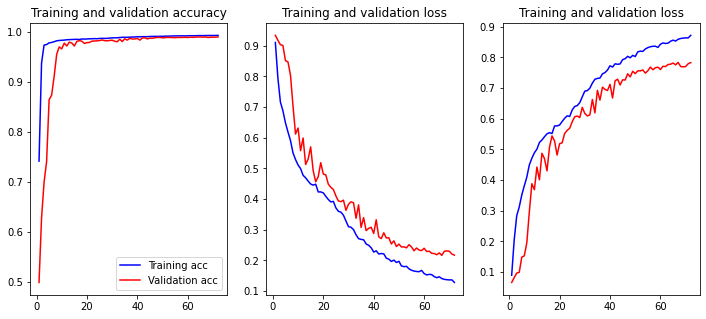

In [ ]:
plot_history(results)

In [ ]:
unet_model.evaluate(X_test,Y_test,verbose = 1)

24/24 [==============================] - 5s 213ms/step - loss: 0.2163 - dice_score: 0.7838 - accuracy: 0.9892


[0.21633897721767426, 0.7837794423103333, 0.989155650138855]

In [ ]:
#only use if model crashes and need to dump GPU memory 
from numba import cuda 
device = cuda.get_current_device()
device.reset()

Saving the model for further use

In [ ]:
#we are saving the model so that if ram crashes or  something we can easily call it back instead of training it again
unet_model.save('unet_seg_model')

In [ ]:
#converting to zip for download
import shutil
shutil.make_archive('unet_seg_model', 'zip', 'unet_seg_model')

'/content/unet_seg_model.zip'

# Training on ResUNET

In [ ]:
res_unet_model = ResUNet(256,256)
res_unet_model.compile(optimizer = tf.keras.optimizers.Adam(lr = 0.0001), loss=dice_loss, metrics=[dice_score,'accuracy'])
res_unet_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_50 (Conv2D)             (None, 256, 256, 16  160         ['input_4[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_29 (BatchN  (None, 256, 256, 16  64         ['conv2d_50[0][0]']              
 ormalization)                  )                                                           

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 ormalization)                                                                                    
                                                                                                  
 activation_29 (Activation)     (None, 16, 16, 256)  0           ['batch_normalization_43[0][0]'] 
                                                                                                  
 conv2d_65 (Conv2D)             (None, 16, 16, 256)  590080      ['activation_29[0][0]']          
                                                                                                  
 batch_normalization_44 (BatchN  (None, 16, 16, 256)  1024       ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_30 (Activation)     (None, 16, 16, 256)  0           ['batch_normalization_44[0][0]'] 
          

In [ ]:
results = res_unet_model.fit(X_train, Y_train, batch_size=32, epochs=75,validation_data=(X_test, Y_test),callbacks = [callback])

Epoch 1/75
72/72 [==============================] - 92s 1s/step - loss: 0.7728 - dice_score: 0.2277 - accuracy: 0.8573 - val_loss: 0.9983 - val_dice_score: 0.0017 - val_accuracy: 0.9793
Epoch 2/75
72/72 [==============================] - 74s 1s/step - loss: 0.4495 - dice_score: 0.5507 - accuracy: 0.9831 - val_loss: 0.9946 - val_dice_score: 0.0054 - val_accuracy: 0.9793
Epoch 3/75
72/72 [==============================] - 74s 1s/step - loss: 0.3670 - dice_score: 0.6335 - accuracy: 0.9856 - val_loss: 0.9996 - val_dice_score: 3.6860e-04 - val_accuracy: 0.9793
Epoch 4/75
72/72 [==============================] - 74s 1s/step - loss: 0.3085 - dice_score: 0.6916 - accuracy: 0.9873 - val_loss: 0.9807 - val_dice_score: 0.0193 - val_accuracy: 0.9708
Epoch 5/75
72/72 [==============================] - 74s 1s/step - loss: 0.2595 - dice_score: 0.7405 - accuracy: 0.9887 - val_loss: 0.9548 - val_dice_score: 0.0451 - val_accuracy: 0.9790
Epoch 6/75
72/72 [==============================] - 74s 1s/step - 

Lowest Validation Loss: epoch 15
Highest Validation Accuracy: epoch 20


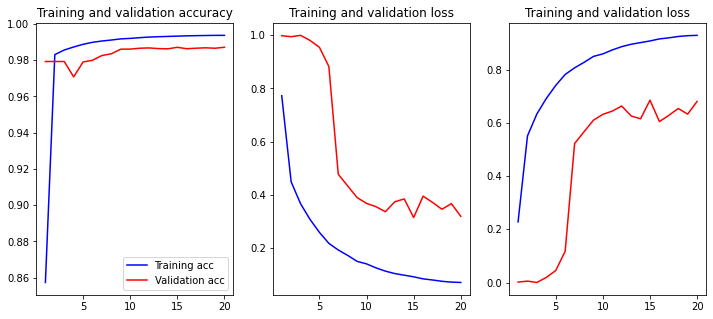

In [ ]:
plot_history(results)

In [ ]:
res_unet_model.evaluate(X_test,Y_test,verbose = 1)

24/24 [==============================] - 6s 266ms/step - loss: 0.3152 - dice_score: 0.6850 - accuracy: 0.9871


[0.31516724824905396, 0.6850284934043884, 0.9871124029159546]

In [ ]:
#we are saving the model so that if ram crashes or  something we can easily call it back instead of training it again
res_unet_model.save('resunet_seg_model')

In [ ]:
#converting to zip for download
import shutil
shutil.make_archive('resunet_seg_model', 'zip', 'resunet_seg_model')

'/content/resunet_seg_model.zip'

#checking the predicted masks vs real masks and loading pretrained models

In [ ]:
#only use del X_train and Y_train if constrained by memory
del X_train
del Y_train

In [1]:
#use this cell if you want to get the pretrained model from your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#copy the trained model from drive to current working directory of colab
!cp drive/MyDrive/models_trained/resunet_seg_model.zip /content/
!cp drive/MyDrive/models_trained/unet_seg_model.zip /content/

In [3]:
#unzip the model to a folder called resunet_seg_model and unet_seg_model
!unzip resunet_seg_model.zip -d resunet_seg_model
!unzip unet_seg_model.zip -d unet_seg_model

Archive:  resunet_seg_model.zip
   creating: resunet_seg_model/assets/
   creating: resunet_seg_model/variables/
  inflating: resunet_seg_model/keras_metadata.pb  
  inflating: resunet_seg_model/saved_model.pb  
  inflating: resunet_seg_model/variables/variables.data-00000-of-00001  
  inflating: resunet_seg_model/variables/variables.index  
Archive:  unet_seg_model.zip
   creating: unet_seg_model/assets/
   creating: unet_seg_model/variables/
  inflating: unet_seg_model/keras_metadata.pb  
  inflating: unet_seg_model/saved_model.pb  
  inflating: unet_seg_model/variables/variables.data-00000-of-00001  
  inflating: unet_seg_model/variables/variables.index  


In [ ]:
#loading the model again here only use this part if your memory crashes so that there is no need to train the model again
#also the modules which are required only in case of memory crash we are importing again
#!unzip /content/distracted_driver_model.zip
from tensorflow.keras.models import load_model
unet_model = load_model('unet_seg_model')
res_unet_model = load_model('resunet_seg_model')
import os
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
Y_pred_unet = unet_model.predict(X_test[0:10])
print(Y_pred_unet[0].shape)
Y_pred_resunet = res_unet_model.predict(X_test[0:10])
print(Y_pred_resunet[0].shape)

(256, 256, 1)
(256, 256, 1)


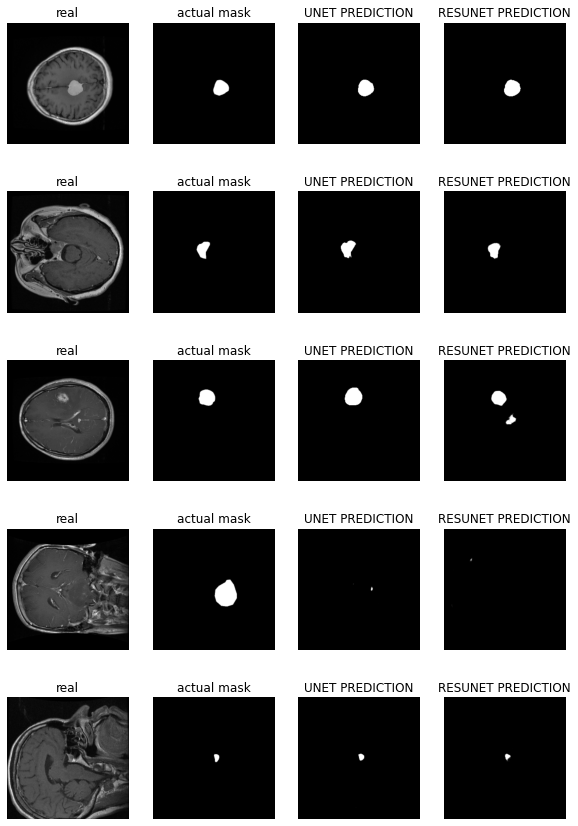

In [ ]:
#we use first make an empty figure fig
#then we use subplot to divide it into 5 rows and 3 columns
#at each iteration we fill 1 row and all its columns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 15))
for i in range(5):
    real_img = X_test[i]
    real_mask = Y_test[i]
    pred_mask_unet = Y_pred_unet[i]
    pred_mask_resunet = Y_pred_resunet[i]
    # Adds a subplot at the 1st position
    fig.add_subplot(5, 4, 4*i  + 1)

    # showing image
    plt.imshow(real_img.reshape(256,256),cmap = "gray")
    plt.axis('off')
    plt.title("real")

    # Adds a subplot at the 2nd position
    fig.add_subplot(5, 4, 4*i + 2)

    # showing image
    plt.imshow(real_mask.reshape((256,256)),cmap = "gray")
    plt.axis('off')
    plt.title("actual mask")

    # Adds a subplot at the 3rd position
    fig.add_subplot(5, 4, 4*i + 3)

    # showing image
    plt.imshow(pred_mask_unet.reshape(256,256),cmap = "gray")
    plt.axis('off')
    plt.title("UNET PREDICTION")

    fig.add_subplot(5, 4, 4*i + 4)

    # showing image
    plt.imshow(pred_mask_resunet.reshape(256,256),cmap = "gray")
    plt.axis('off')
    plt.title("RESUNET PREDICTION")